In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
df=pd.read_csv("Training set.csv")

In [268]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow,Credit Score
0,5279,5279,4377.072500,10,6,27,6,35,18,16.66,2950.80,154.172426,301.593795,271.941029,76,15,4009,4251,Best
1,473,473,2184.576667,8,6,32,7,51,19,25.17,2989.13,132.481128,71.016720,294.959819,75,19,2425,1073,Best
2,1355,1355,1837.084167,3,7,3,2,14,8,3.37,1336.73,26.746701,31.027274,375.934441,94,0,1731,3322,Good
3,1546,1546,6867.951667,5,4,9,1,6,12,10.36,625.32,66.457710,176.267359,704.070097,86,8,1984,1614,Standard
4,1323,1323,1089.858750,4,7,4,2,12,5,11.90,1439.09,14.350146,50.840361,303.795367,93,0,2765,3986,Good


In [269]:
df.shape

(6094, 19)

In [270]:
data=df.copy()

In [271]:
numerical=[feature for feature in data.columns if data[feature].dtype!='O']

In [272]:
continuous =[feature for feature in numerical if len(data[feature].unique())>25]
continuous

['Unnamed: 0.1',
 'Unnamed: 0',
 'Monthly_Inhand_Salary ',
 'Accounts of user',
 'Credit cards user have',
 'Interest Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Utlization Ratio',
 'Cumulative Balance',
 'Cash Flow']

In [273]:
data["Credit Score"].isnull().value_counts()

False    6094
Name: Credit Score, dtype: int64

In [274]:
data["Credit Score"].unique()
data=data.replace(['Best','Good','Standard'],[0,1,2])

In [275]:
data

,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow,Credit Score
0,5279,5279,4377.072500,10,6,27,6,35,18,16.66,2950.80,154.172426,301.593795,271.941029,76,15,4009,4251,0
1,473,473,2184.576667,8,6,32,7,51,19,25.17,2989.13,132.481128,71.016720,294.959819,75,19,2425,1073,0
2,1355,1355,1837.084167,3,7,3,2,14,8,3.37,1336.73,26.746701,31.027274,375.934441,94,0,1731,3322,1
3,1546,1546,6867.951667,5,4,9,1,6,12,10.36,625.32,66.457710,176.267359,704.070097,86,8,1984,1614,2
4,1323,1323,1089.858750,4,7,4,2,12,5,11.90,1439.09,14.350146,50.840361,303.795367,93,0,2765,3986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,7500,7500,2838.603333,8,8,15,3,5,9,12.65,2152.42,81.038302,168.593275,294.228756,90,15,2097,1868,0
6090,5966,5966,13239.663330,2,6,6,4,6,1,7.33,187.05,63191.000000,206.691671,1013.696788,84,4,3002,1733,0
6091,3274,3274,636.025000,6,8,27,2,15,10,11.58,2085.35,9.718145,47.990820,295.893534,97,18,3254,1397,2
6092,2001,2001,5489.962500,6,3,4,1,24,9,9.20,1049.75,49.233888,452.404982,327.357380,74,19,2852,2439,0


In [276]:
discrete=[feature for feature in numerical if len(data[feature].unique())<=25]
discrete

['Credit Inquiries']

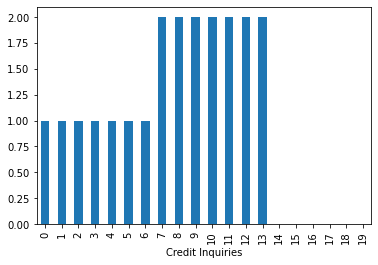

In [277]:
for feature in discrete:
    data.groupby(feature)["Credit Score"].median().plot.bar()
    plt.show()

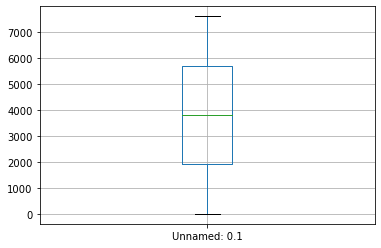

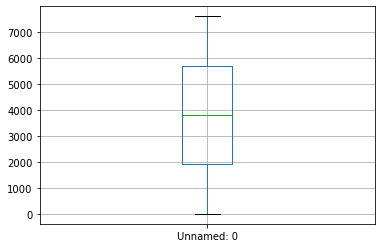

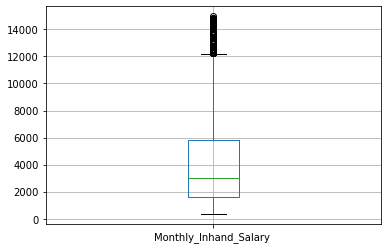

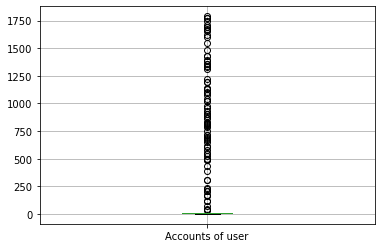

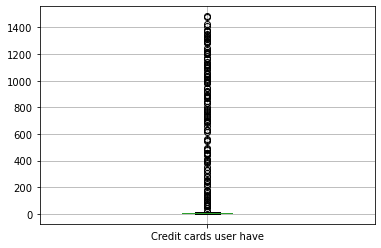

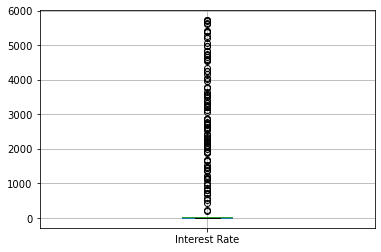

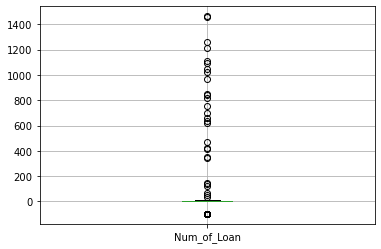

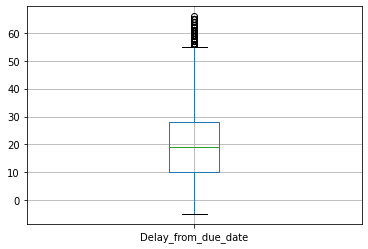

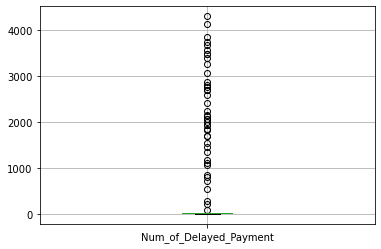

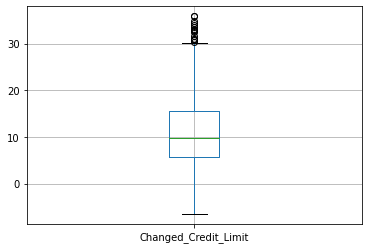

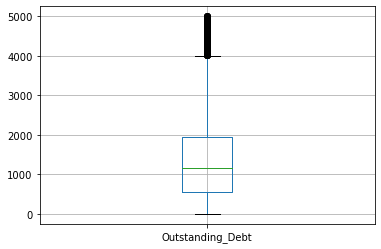

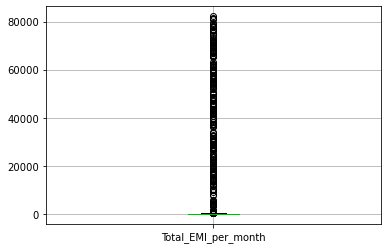

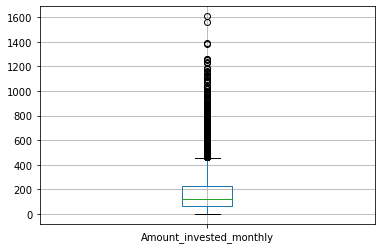

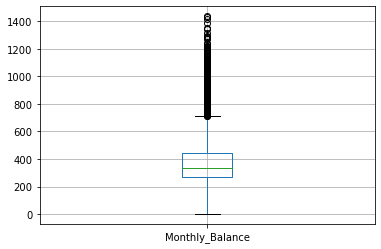

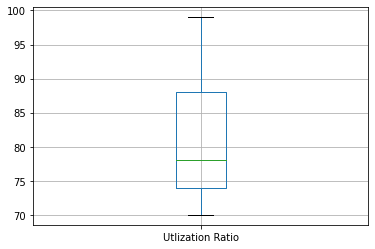

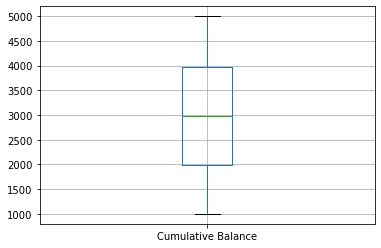

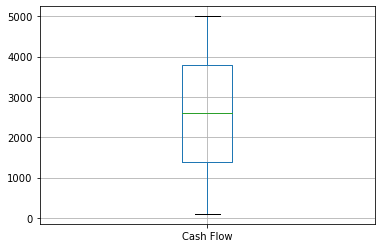

In [278]:
for feature in continuous:
    data.boxplot([feature])
    plt.show()

In [279]:
categorical =[feature for feature in data if data[feature].dtype=='O']
categorical

[]

In [280]:
nan_feature=[feature for feature in data.columns if data[feature].isnull().sum()>=1]
nan_feature

[]

In [281]:
data.isnull()

,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow,Credit Score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [282]:
feature_scale=[feature for feature in data.columns if feature not in ['Credit Score']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(data[feature_scale])

MinMaxScaler()

In [283]:
data

,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow,Credit Score
0,5279,5279,4377.072500,10,6,27,6,35,18,16.66,2950.80,154.172426,301.593795,271.941029,76,15,4009,4251,0
1,473,473,2184.576667,8,6,32,7,51,19,25.17,2989.13,132.481128,71.016720,294.959819,75,19,2425,1073,0
2,1355,1355,1837.084167,3,7,3,2,14,8,3.37,1336.73,26.746701,31.027274,375.934441,94,0,1731,3322,1
3,1546,1546,6867.951667,5,4,9,1,6,12,10.36,625.32,66.457710,176.267359,704.070097,86,8,1984,1614,2
4,1323,1323,1089.858750,4,7,4,2,12,5,11.90,1439.09,14.350146,50.840361,303.795367,93,0,2765,3986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,7500,7500,2838.603333,8,8,15,3,5,9,12.65,2152.42,81.038302,168.593275,294.228756,90,15,2097,1868,0
6090,5966,5966,13239.663330,2,6,6,4,6,1,7.33,187.05,63191.000000,206.691671,1013.696788,84,4,3002,1733,0
6091,3274,3274,636.025000,6,8,27,2,15,10,11.58,2085.35,9.718145,47.990820,295.893534,97,18,3254,1397,2
6092,2001,2001,5489.962500,6,3,4,1,24,9,9.20,1049.75,49.233888,452.404982,327.357380,74,19,2852,2439,0


In [284]:
scaler.transform(data[feature_scale])

array([[0.69305501, 0.69305501, 0.27541114, ..., 0.78947368, 0.75243811,
        0.84731578],
       [0.06209794, 0.06209794, 0.12527236, ..., 1.        , 0.35633908,
        0.19861196],
       [0.17789156, 0.17789156, 0.1014766 , ..., 0.        , 0.1827957 ,
        0.65768524],
       ...,
       [0.42982802, 0.42982802, 0.0192299 , ..., 0.94736842, 0.56364091,
        0.26474791],
       [0.26270185, 0.26270185, 0.35162015, ..., 1.        , 0.46311578,
        0.47744438],
       [0.70001313, 0.70001313, 0.65032156, ..., 0.73684211, 0.94948737,
        0.20269443]])

In [285]:
data = pd.concat([data[['Credit Score']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [286]:
data

,Credit Score,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow
0,0,0.693055,0.693055,0.275411,0.005590,0.004043,0.004545,0.067775,0.563380,0.004878,0.546786,0.590310,0.001821,0.187640,0.189072,0.206897,0.789474,0.752438,0.847316
1,0,0.062098,0.062098,0.125272,0.004472,0.004043,0.005420,0.068414,0.788732,0.005110,0.747873,0.597980,0.001557,0.044184,0.205117,0.172414,1.000000,0.356339,0.198612
2,1,0.177892,0.177892,0.101477,0.001677,0.004717,0.000350,0.065217,0.267606,0.002555,0.232750,0.267310,0.000271,0.019304,0.261558,0.827586,0.000000,0.182796,0.657685
3,2,0.202967,0.202967,0.445983,0.002795,0.002695,0.001399,0.064578,0.154930,0.003484,0.397921,0.124946,0.000754,0.109667,0.490279,0.551724,0.421053,0.246062,0.309043
4,1,0.173690,0.173690,0.050308,0.002236,0.004717,0.000524,0.065217,0.239437,0.001858,0.434310,0.287794,0.000120,0.031631,0.211275,0.793103,0.000000,0.441360,0.793223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,0,0.984640,0.984640,0.170059,0.004472,0.005391,0.002448,0.065857,0.140845,0.002787,0.452032,0.430542,0.000932,0.104892,0.204607,0.689655,0.789474,0.274319,0.360890
6090,0,0.783248,0.783248,0.882308,0.001118,0.004043,0.000874,0.066496,0.154930,0.000929,0.326323,0.037241,0.768697,0.128595,0.706099,0.482759,0.210526,0.500625,0.333333
6091,2,0.429828,0.429828,0.019230,0.003354,0.005391,0.004545,0.065217,0.281690,0.003020,0.426749,0.417120,0.000064,0.029858,0.205767,0.931034,0.947368,0.563641,0.264748
6092,0,0.262702,0.262702,0.351620,0.003354,0.002022,0.000524,0.064578,0.408451,0.002787,0.370510,0.209881,0.000545,0.281468,0.227699,0.137931,1.000000,0.463116,0.477444


In [287]:
X_train=data

In [288]:
X_train=X_train.drop(["Credit Score"],axis=1)

In [289]:
Y_train=data[["Credit Score"]]

In [290]:
Y_train.isnull().value_counts()

Credit Score
False           6094
dtype: int64

In [291]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option("display.max_columns",None)

In [292]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [293]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 18
selected features: 6
features with coefficients shrank to zero: 11


In [294]:
X_train=X_train[selected_feature]

In [295]:
X_train

,Unnamed: 0.1,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Utlization Ratio,Credit Inquiries
0,0.693055,0.563380,0.546786,0.590310,0.206897,0.789474
1,0.062098,0.788732,0.747873,0.597980,0.172414,1.000000
2,0.177892,0.267606,0.232750,0.267310,0.827586,0.000000
3,0.202967,0.154930,0.397921,0.124946,0.551724,0.421053
4,0.173690,0.239437,0.434310,0.287794,0.793103,0.000000
...,...,...,...,...,...,...
6089,0.984640,0.140845,0.452032,0.430542,0.689655,0.789474
6090,0.783248,0.154930,0.326323,0.037241,0.482759,0.210526
6091,0.429828,0.281690,0.426749,0.417120,0.931034,0.947368
6092,0.262702,0.408451,0.370510,0.209881,0.137931,1.000000


In [296]:
k=np.array(Y_train)
k

array([[0],
       [0],
       [1],
       ...,
       [2],
       [0],
       [0]], dtype=int64)

In [297]:
X_train["Credit Score"]=k

In [298]:
X_train

,Unnamed: 0.1,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Utlization Ratio,Credit Inquiries,Credit Score
0,0.693055,0.563380,0.546786,0.590310,0.206897,0.789474,0
1,0.062098,0.788732,0.747873,0.597980,0.172414,1.000000,0
2,0.177892,0.267606,0.232750,0.267310,0.827586,0.000000,1
3,0.202967,0.154930,0.397921,0.124946,0.551724,0.421053,2
4,0.173690,0.239437,0.434310,0.287794,0.793103,0.000000,1
...,...,...,...,...,...,...,...
6089,0.984640,0.140845,0.452032,0.430542,0.689655,0.789474,0
6090,0.783248,0.154930,0.326323,0.037241,0.482759,0.210526,0
6091,0.429828,0.281690,0.426749,0.417120,0.931034,0.947368,2
6092,0.262702,0.408451,0.370510,0.209881,0.137931,1.000000,0


In [299]:
Y_train

,Credit Score
0,0
1,0
2,1
3,2
4,1
...,...
6089,0
6090,0
6091,2
6092,0


In [300]:
X_train.shape

(6094, 7)

In [301]:
#X_train=np.array(X_train)
#Y_train=np.array(Y_train)
x_train_copy=X_train.copy()

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm

ModuleNotFoundError: No module named 'sklearn'

In [303]:
temp_train_set,test_set=train_test_split(X_train, test_size=0.3)

In [304]:
test_set.shape

(1829, 7)

In [305]:
temp_train_set.shape

(4265, 7)

In [306]:
training_set,validation_set=train_test_split(temp_train_set, test_size=0.3)

In [307]:
training_set.shape

(2985, 7)

In [308]:
validation_set.shape

(1280, 7)

In [309]:
X_train=training_set

In [310]:
X_train.shape

(2985, 7)

In [311]:
X_train=X_train.drop(["Credit Score"],axis=1)


In [314]:
X_train.shape

(2985, 6)

In [313]:
Y_train=training_set[["Credit Score"]]
Y_train

,Credit Score
2888,0
3366,2
3102,1
3544,0
959,1
...,...
2046,0
380,1
3948,0
3543,0


In [220]:
X_validation=validation_set.drop(["Credit Score"],axis=1)
Y_validation=validation_set[["Credit Score"]]
X_validation

,Unnamed: 0.1,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Utlization Ratio,Credit Inquiries
4553,0.146777,0.676056,0.520558,0.505307,0.103448,0.894737
744,0.386635,0.225352,0.255435,0.058186,0.103448,0.947368
1496,0.646055,0.225352,0.204159,0.223641,0.586207,0.842105
4198,0.325194,0.197183,0.482042,0.098080,0.379310,0.526316
5768,0.206118,0.253521,0.282609,0.093462,0.103448,0.210526
...,...,...,...,...,...,...
2938,0.598530,0.661972,0.218100,0.922824,0.931034,0.631579
2841,0.797033,0.492958,0.501418,0.048114,0.551724,0.736842
3986,0.372062,0.816901,0.755198,0.806651,0.344828,0.947368
4072,0.043062,0.169014,0.396503,0.420850,0.793103,0.473684


In [315]:
X_test=test_set.drop(["Credit Score"],axis=1)
Y_test=test_set[["Credit Score"]]

In [316]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

X_validation=np.array(X_validation)
Y_validation=np.array(Y_validation)

X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [317]:
Y_train=Y_train.reshape((len(Y_train),))
Y_validation=Y_validation.reshape((len(Y_validation),))
Y_test=Y_test.reshape((len(Y_test),))

In [318]:
Y_validation

array([0, 0, 0, ..., 0, 2, 1], dtype=int64)

In [319]:
X_train.shape

(2985, 6)

In [320]:
model=svm.SVC(C=1,kernel="linear")
model.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [321]:
training_set=np.array(training_set)
validation_set=np.array(validation_set)
test_set=np.array(test_set)

In [323]:
from sklearn import metrics
y_pred=model.predict(X_train)
print(f"Accuracy:{metrics.accuracy_score(Y_train,y_pred)}")
print(y_pred)

Accuracy:0.8984924623115578
[0 2 1 ... 0 0 0]


In [324]:
y_pred=model.predict(X_validation)
print(f"Accuracy:{metrics.accuracy_score(Y_validation,y_pred)}")
print(y_pred)

Accuracy:0.89296875
[0 0 0 ... 0 2 1]


In [260]:
test_set.shape

(1829, 7)

In [325]:
y_pred=model.predict(X_test)
print(f"Accuracy:{metrics.accuracy_score(Y_test,y_pred)}")
print(y_pred)

Accuracy:0.8906506287588847
[0 2 0 ... 0 0 0]


In [171]:
test_data=pd.read_csv("Test SET.csv")

In [172]:
test_data.head()

,Unnamed: 0.1,Unnamed: 0,Monthly_Inhand_Salary,Accounts of user,Credit cards user have,Interest Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Utlization Ratio,Credit Inquiries,Cumulative Balance,Cash Flow
0,7531,7531,3520.621667,7,6,28,9,32,16,27.12,4838.26,220.401498,120.909497,260.751172,85,19,3630,3229
1,1914,1914,2455.479851,3,5,5,3,9,16,9.48,595.94,183.764870,48.938091,380.803605,80,0,4401,1920
2,1282,1282,592.179167,6,5,29,3,41,22,-0.34,2688.12,9.575855,46.471450,283.170612,73,8,1688,4100
3,5517,5517,4976.090000,9,7,30,9,26,15,25.00,3680.62,432.581034,298.322639,36.705328,71,15,4304,402
4,3610,3610,1720.165833,7,9,32,4,47,19,7.41,1457.54,62.671262,100.880899,268.464422,89,10,1528,645


In [235]:
columns=x_train_copy.columns
columns

Index(['Unnamed: 0.1', 'Delay_from_due_date', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Utlization Ratio', 'Credit Inquiries',
       'Credit Score'],
      dtype='object')

In [247]:
X_test_set=test_data.copy()
X_test_set.drop(X_test_set.columns.difference(columns), 1, inplace=True)
        

C:\Users\Shirshak\AppData\Local\Temp\ipykernel_20696\1845189299.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_set.drop(X_test_set.columns.difference(columns), 1, inplace=True)


In [248]:
X_test_set

,Unnamed: 0.1,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Utlization Ratio,Credit Inquiries
0,7531,32,27.12,4838.26,85,19
1,1914,9,9.48,595.94,80,0
2,1282,41,-0.34,2688.12,73,8
3,5517,26,25.00,3680.62,71,15
4,3610,47,7.41,1457.54,89,10
...,...,...,...,...,...,...
1519,7258,30,11.19,695.12,89,16
1520,280,16,0.32,1237.46,72,19
1521,3285,2,3.58,288.32,82,18
1522,5567,26,11.18,112.36,78,16


In [254]:
feature_scale=[feature for feature in X_test_set.columns if feature not in ['Credit Score']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(X_test_set[feature_scale])

MinMaxScaler()

In [258]:
scaler.transform(X_test_set[feature_scale])
X_test_set = pd.DataFrame(scaler.transform(X_test_set[feature_scale]), columns=feature_scale)
                
X_test_set

,Unnamed: 0.1,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Utlization Ratio,Credit Inquiries
0,0.989228,0.507042,0.825977,0.970777,0.517241,1.000000
1,0.251314,0.183099,0.381084,0.119312,0.344828,0.000000
2,0.168287,0.633803,0.133417,0.539228,0.103448,0.421053
3,0.724645,0.422535,0.772509,0.738430,0.034483,0.789474
4,0.474120,0.718310,0.328878,0.292242,0.655172,0.526316
...,...,...,...,...,...,...
1519,0.953363,0.478873,0.424212,0.139219,0.655172,0.842105
1520,0.036653,0.281690,0.150063,0.248070,0.068966,1.000000
1521,0.431424,0.084507,0.232282,0.057571,0.413793,0.947368
1522,0.731214,0.422535,0.423960,0.022254,0.275862,0.842105


In [261]:
X_test_set=np.array(X_test_set)

In [326]:
y_pred_test=model.predict(X_test_set)
#print(f"Accuracy:{metrics.accuracy_score(Y_validation,y_pred)}")
print(y_pred_test)

[0 1 2 ... 0 0 2]


In [335]:
submission=pd.DataFrame(y_pred_test)

In [336]:
submission.to_csv("submission.csv",index=None)

In [337]:
submission

,0
0,0
1,1
2,2
3,0
4,2
...,...
1519,0
1520,0
1521,0
1522,0
